**Incremental principal component analysis (IPCA)** is typically used as a replacement for principal component analysis (PCA) when the dataset to be decomposed is too large to fit in memory. 

IPCA builds a low-rank approximation for the input data using an amount of memory which is independent of the number of input data samples. It is still dependent on the input data features, but changing the batch size allows for control of memory usage.

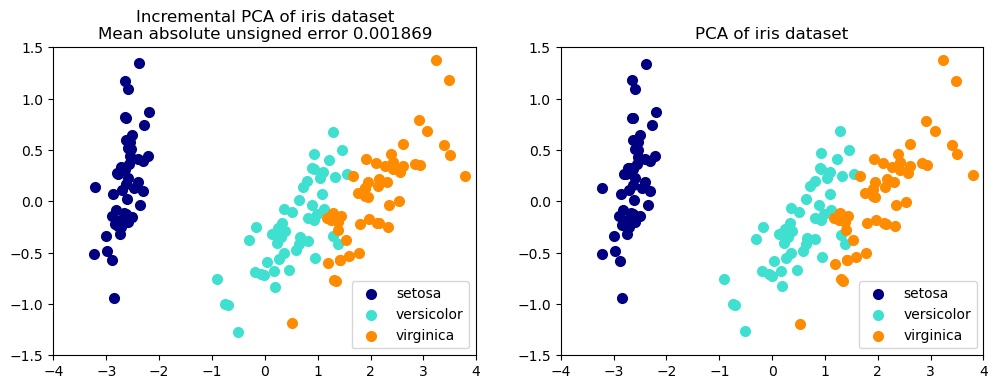

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, IncrementalPCA

iris = load_iris()
X = iris.data
y = iris.target

n_components = 2
ipca = IncrementalPCA(n_components=n_components)

X_ipca = np.zeros((X.shape[0], n_components))
for i in range(3):
    ipca.partial_fit(X[i*50:(i+1)*50])
    
for i in range(3):
    X_ipca[i*50:(i+1)*50] = ipca.transform(X[i*50:(i+1)*50])

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title, j in [(X_ipca, "Incremental PCA", 0), (X_pca, "PCA", 1)]:
    for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
        ax[j].scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                   color=color, lw=2, label=target_name)
    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        ax[j].set_title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        ax[j].set_title(title + " of iris dataset")
    ax[j].legend(loc="best", shadow=False, scatterpoints=1)
    # set axis limits   
    ax[j].set_xlim(-4, 4)
    ax[j].set_ylim(-1.5, 1.5)
plt.show()